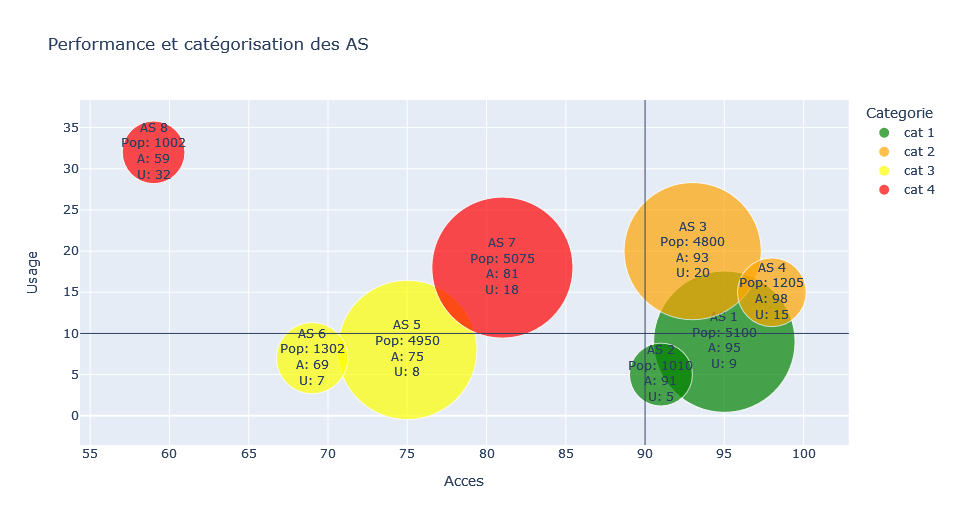

# Dashboard PEV with plotly

Mensuellement les FOSA sont appelées à analyser leur donner pour prendre des décisions. Leur analyse consiste à catégoriser les aires de santé. Deux critères sont utilisé: l'accessibilité et l'utilisation du service.
- Le taux de couverture en DCTHepBHIb1 ou PENTA1 permet d’évaluer l’accessibilité au service
- Le Taux d’ abandon permet d’apprecier l’utilisation des services
On dénombre 4 catégories:

|   accessibilité    |   utilisation    |   catégories    |       
|:-:    |:-:    |:-:    |
|   >=90    |   <10    |   cat 1    |       
|   >=90    |   >=10    |   cat 2    |       
|   <90    |    <10   |   cat 3    |       
|   <90    |    >=10   |    cat 4   |    

Le dashboard realisé avec plotly python nous permet de visualiser les performances sous forme de diagramme de bulles.
Chaque FOSA/aire de santé est représenté par une bulle dont la couleur permet d'identifier la catégorie. La taille de la bulle est proportionnelle à la population cible.
Ce dashboard est d'utilisation facile.   

In [ ]:
# Importation des librairies
import pandas as pd
import numpy as np
import plotly.express as px

In [ ]:
# Création des données fictives
df = pd.DataFrame({
    "Pop_cible": [5100,1010,4800,1205,4950,1302,5075,1002],
    "Acces" : [95, 91, 93, 98, 75, 69, 81, 59],
    "Usage" : [9, 5, 20, 15, 8, 7, 18, 32],
    "Categorie": ['cat 1', 'cat 1', 'cat 2', 'cat 2', 'cat 3', 'cat 3', 'cat 4', 'cat 4']
})

In [ ]:
df.index = ['AS 1', 'AS 2', 'AS 3', 'AS 4', 'AS 5', 'AS 6', 'AS 7', 'AS 8']

In [ ]:
# On pouvait retrouver les catégories avec np.select

conditions = [
  (df.Acces >= 90) & (df.Usage < 10),
  (df.Acces >= 90) & (df.Usage >= 10),
  (df.Acces < 90) & (df.Usage < 10),
  (df.Acces < 90) & (df.Usage >= 10)
]
values = ['cat 1', 'cat 2', 'cat 3', 'cat 4']
df["Categories"] = np.select(conditions, values, default=None)
df

In [ ]:
df['Categorie'] = df.Categorie.astype('category')

In [ ]:
df

In [ ]:
df['texte'] = df.index + '<br>' + 'Pop: ' + df.Pop_cible.astype(str) + '<br>' + 'A: ' + df.Acces.astype(str) + '<br>' + 'U: ' + df.Usage.astype(str)

In [ ]:
df.texte.head()

In [ ]:
df.texte.dtype

In [ ]:
df

In [ ]:
color = ['green',  'orange', 'yellow', 'red']
fig = px.scatter(df, x='Acces', y='Usage', size='Pop_cible', color='Categorie', size_max=100, text='texte', color_discrete_sequence=color, title="Performance et catégorisation des AS")
fig.add_hline(y = 10, line_width=1)
fig.add_vline(x = 90, line_width=1)
fig.show()

In [ ]:
#! pip install -U kaleido

In [ ]:
#fig.write_image('dashboard_PEV.png')

In [ ]:
import plotly.graph_objects as go

color = ['green', 'green', 'orange', 'orange', 'yellow', 'yellow', 'red', 'red']
fig = go.Figure(
    data=[
        go.Scatter(
            x=df["Acces"], y=df["Usage"], 
            mode='markers', 
            marker=dict(
                color=color,
                #opacity=[1, 0.8, 0.6, 0.4],
                size=df['Pop_cible']/50,
            )
        )
    ]
)

fig.show()

In [ ]:
import plotly.graph_objects as go

color = ['green', 'green', 'orange', 'orange', 'yellow', 'yellow', 'red', 'red']
fig = go.Figure(
    data=[
        go.Scatter(
            x=df["Acces"], y=df["Usage"], 
            mode='markers', 
            marker=dict(
                color=color,
                #opacity=[1, 0.8, 0.6, 0.4],
                size=df['Pop_cible']/50,
            )
        )
    ]
)

fig.show()

In [ ]:
df.Categorie.unique()